In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [3]:
train_df = pd.read_csv('../data/train_LZdllcl.csv')

In [4]:
train_df.department.value_counts().sort_index().index

Index(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'R&D', 'Sales & Marketing', 'Technology'],
      dtype='object')

In [5]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


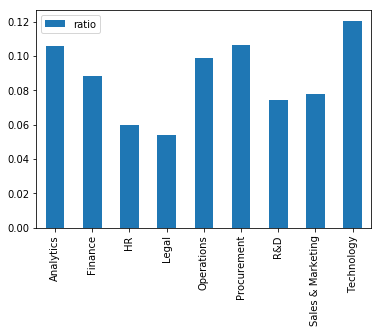

In [6]:
promoted = train_df[train_df['is_promoted'] == 1]['department'].value_counts().sort_index().tolist()
unpromoted = train_df[train_df['is_promoted'] == 0]['department'].value_counts().sort_index().tolist()
ratio = [None]*9
for i in range(9):
    ratio[i] = (promoted[i]/unpromoted[i])
index = ['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement', 
         'R&D', 'Sales & Marketing', 'Technology']
df = pd.DataFrame({'ratio': ratio}, index=index)
ax = df.plot.bar(rot=90, stacked = True)
plt.show()

In [7]:
train_df.region.unique().sort

<function ndarray.sort>

In [8]:
train_df.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [9]:
train_df.education.replace({np.NaN: 'Unknown'}, inplace = True)
#test_df.education.replace({np.NaN: 'Unknown'}, inplace = True)

In [31]:
def x(train_df):    
    promoted = train_df[train_df['is_promoted'] == 1]['region'].value_counts().sort_index().tolist()
    unpromoted = train_df[train_df['is_promoted'] == 0]['region'].value_counts().sort_index().tolist()
    ratio = [None]*34
    for i in range(34):
        ratio[i] = (promoted[i]/unpromoted[i])
    index = ['region_1', 'region_10', 'region_11', 'region_12', 'region_13',
           'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
           'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
           'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
           'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
           'region_32', 'region_33', 'region_34', 'region_4', 'region_5',
           'region_6', 'region_7', 'region_8', 'region_9']
    df = pd.DataFrame({'ratio':ratio}, index=index)
    #ax = df.plot.line(rot=90, figsize = (20, 5), stacked = True)

    regfreq = train_df['region'].value_counts().sort_index().tolist()
    regfreq=(np.array(regfreq))/54000

    df1 = pd.DataFrame({'freq':regfreq}, index=index)
    #df1.plot.line(rot=90, figsize = (20, 5), stacked = True,color='orange')
    df1=pd.concat([df1,df],axis=1)
    #df1.plot.line(y=['freq','ratio'],rot=90, figsize = (20, 10), stacked = True,color=['orange','blue'])

In [79]:
def plotcategorical(train_df,colname):
    promoted = train_df[train_df['is_promoted'] == 1][colname].value_counts().sort_index().tolist()
    unpromoted = train_df[train_df['is_promoted'] == 0][colname].value_counts().sort_index().tolist()
    ratio = [None]*len(unpromoted)
    for i in range(len(unpromoted)):
        try:
            ratio[i] = (promoted[i])/(promoted[i]+unpromoted[i])
        except:
            ratio[i] =  0
    index =train_df[colname].unique()
    index.sort()
   
    df = pd.DataFrame({'ratio':ratio}, index=index)
    #ax = df.plot.line(rot=90, figsize = (20, 5), stacked = True)

    regfreq = train_df[colname].value_counts().sort_index().tolist()
    regfreq=(np.array(regfreq))/16000

    
    
    df1 = pd.DataFrame({'freq':regfreq}, index=index)
    df1=pd.concat([df1,df],axis=1)
    
    f,ax=plt.subplots(1,1,figsize=(14,7))
    ax.set_title(colname)
    ax.plot( index, df1['freq'], marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    ax.plot( index, df1['ratio'], marker='d', color='olive', linewidth=2)
    #plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
    plt.xticks(rotation = 90)
    ax.legend()


In [80]:
def bar_custom(xdata,ydata,hline,ax,col):
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    ax.bar(xdata,ydata, align='center', alpha=0.5,width=0.5,color=col)
    #ax.plot( xdata, ydata, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
   
    plt.xticks(rotation = 90)

    ax.axhline(hline, color="grey")
    ax.text(1.02,hline,hline, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
            transform=ax.get_yaxis_transform())
    
    #plt.legend(loc='best')
    #plt.show()
    return
    #plt.show()    

In [81]:
def plotratio(data,variable,target,pos,neg,axis):
    ser,quant_bins = pd.qcut(data[variable],100,retbins=True,labels=False,duplicates='drop')
    quant_interval = pd.qcut(data[variable],100,duplicates='drop').values.categories
    
    if(len(quant_bins)==2):
        left=np.copy(quant_bins)
        left[1]=left[0]+0.4
        left[0]=left[0]-0.01

        right=np.copy(quant_bins)
        right[0]=left[1]
        right[1]=right[1]+0.1
        quant_interval = pd.IntervalIndex.from_arrays(left,right)
        l=list(quant_bins)
        l.append(l[1]+0.1)
        l[1]=l[0]+0.4
        quant_bins=np.array(l)
    
    
    pos_freq,_ = np.histogram(data[data[target]==pos][variable],bins=quant_bins)
    neg_freq,_ = np.histogram(data[data[target]==neg][variable],bins=quant_bins)
    ratio_freq = neg_freq/pos_freq
    intvl_str=[str(x) for x in quant_interval]
    
    bar_custom(intvl_str,ratio_freq,0.093,axis,'blue')
    return ratio_freq


In [82]:
def plotsum(data,variable,target,pos,neg,axis):
    ser,quant_bins = pd.qcut(data[variable],100,retbins=True,labels=False,duplicates='drop')
    quant_interval = pd.qcut(data[variable],100,duplicates='drop').values.categories

    if(len(quant_bins)==2):
        left=np.copy(quant_bins)
        left[1]=left[0]+0.4
        left[0]=left[0]-0.01

        right=np.copy(quant_bins)
        right[0]=left[1]
        right[1]=right[1]+0.1
        quant_interval = pd.IntervalIndex.from_arrays(left,right)
        l=list(quant_bins)
        l.append(l[1]+0.1)
        l[1]=l[0]+0.4
        quant_bins=np.array(l)    
    
    pos_freq,_ = np.histogram(data[data[target]==pos][variable],bins=quant_bins)
    neg_freq,_ = np.histogram(data[data[target]==neg][variable],bins=quant_bins)
    sum_freq = neg_freq+pos_freq
    sum_freq = sum_freq/54000
    intvl_str=[str(x) for x in quant_interval]
    
    bar_custom(intvl_str,sum_freq,0.0,axis,'orange')
    return sum_freq


In [83]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [84]:
a_df = train_df.loc[train_df['department']=='Sales & Marketing'] 

In [85]:
a_df.shape

(16840, 14)

In [86]:
train_df.shape

(54808, 14)

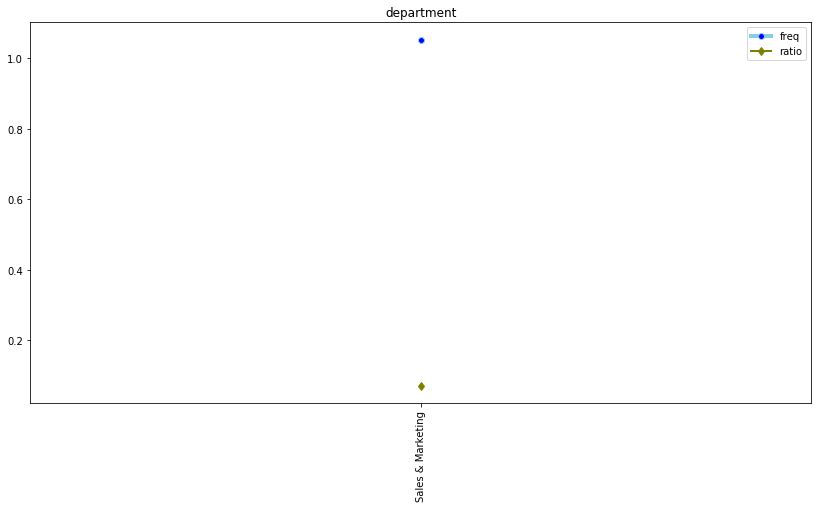

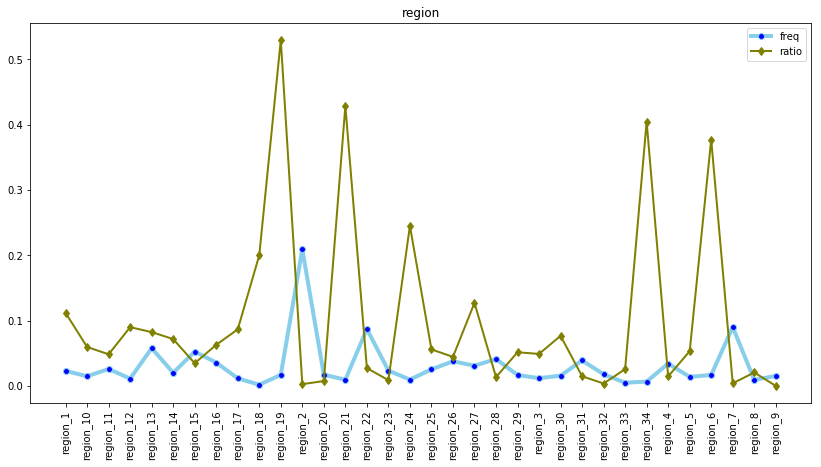

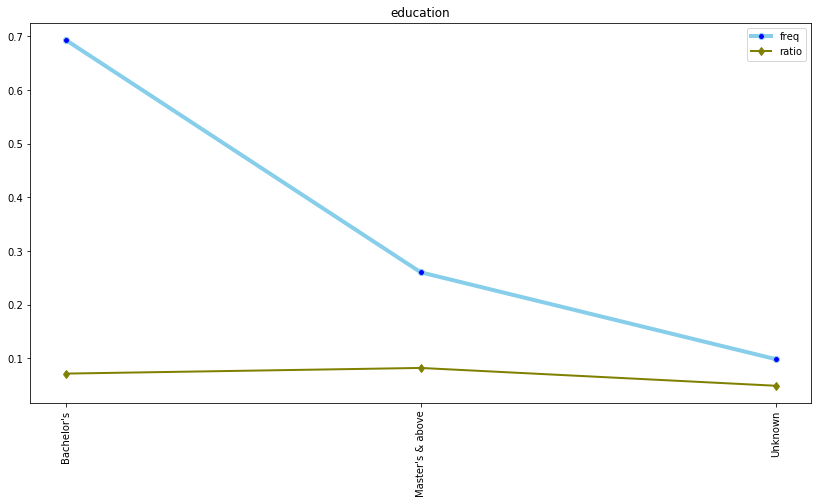

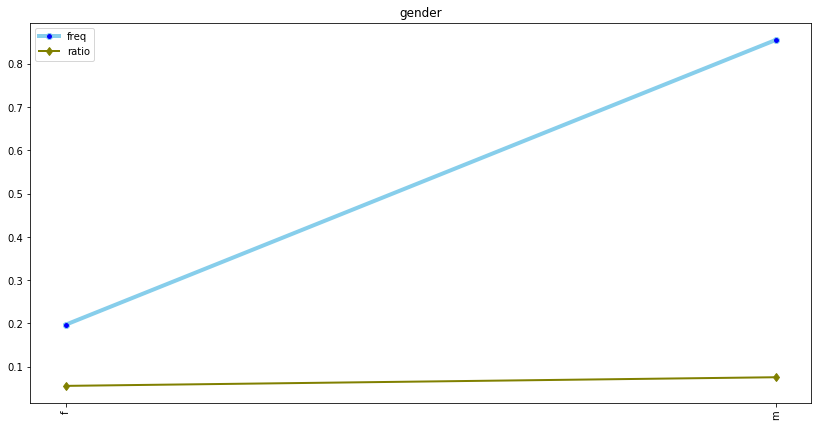

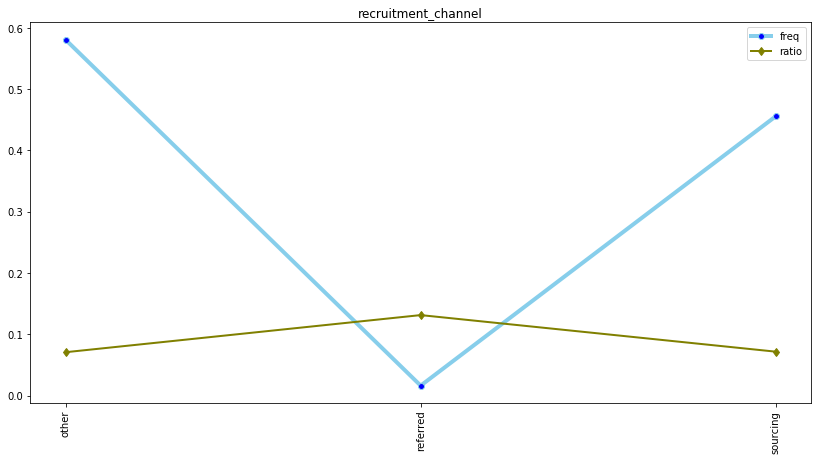

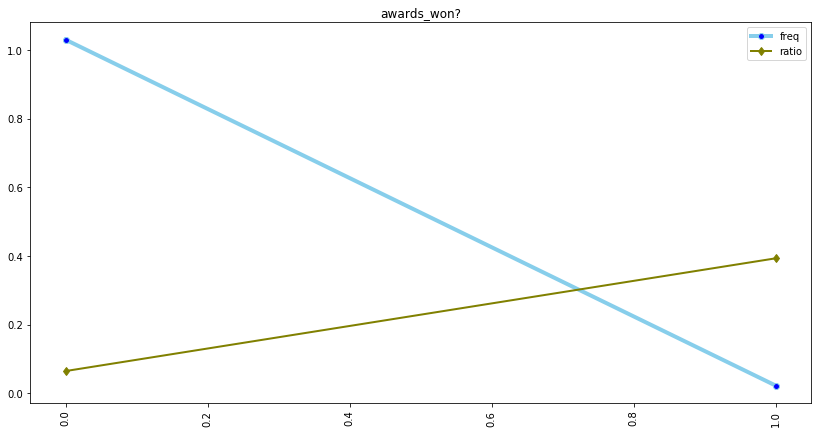

In [87]:
#categorical columns

catcols = ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'awards_won?']

for cl in catcols:
    plotcategorical(a_df , cl)

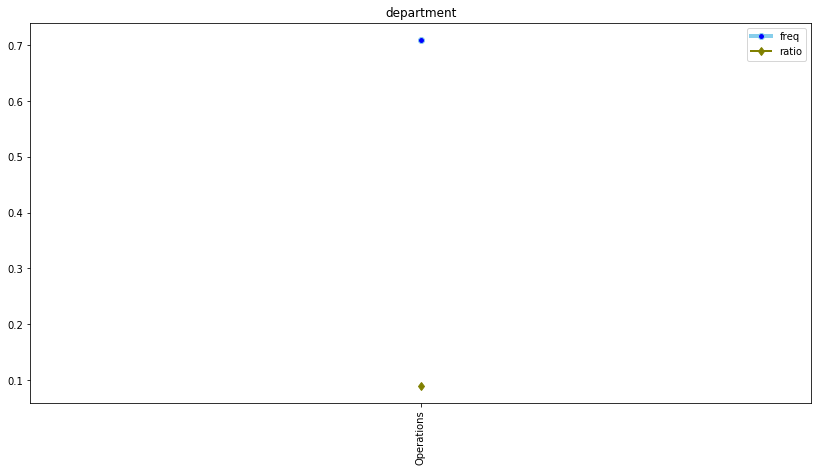

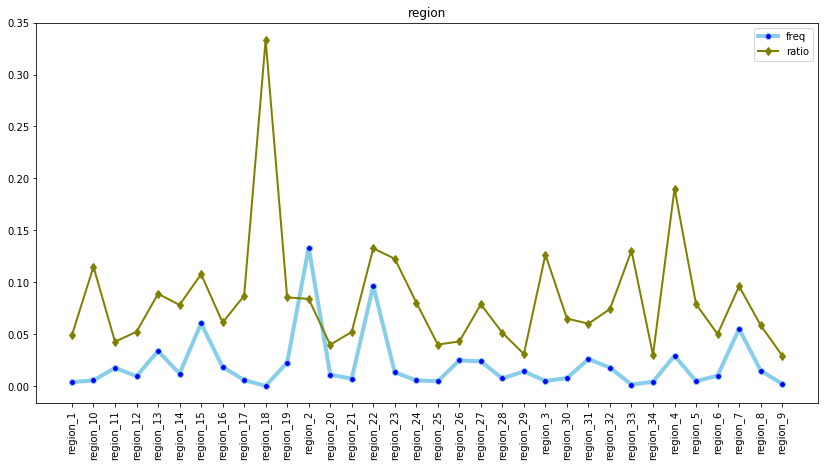

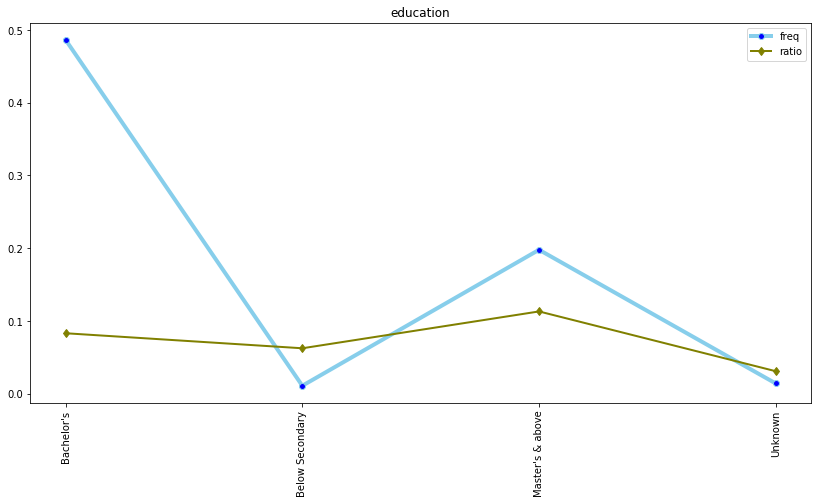

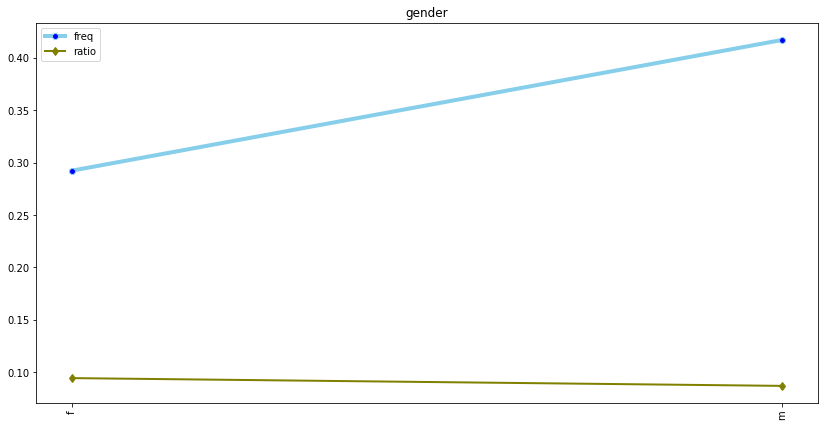

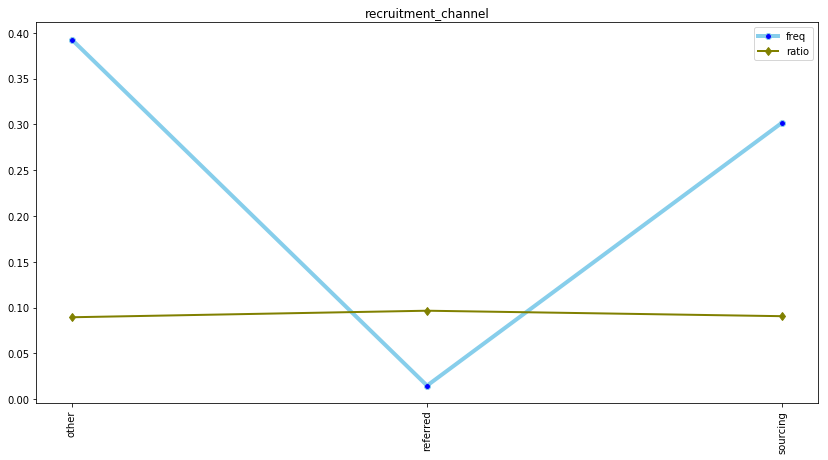

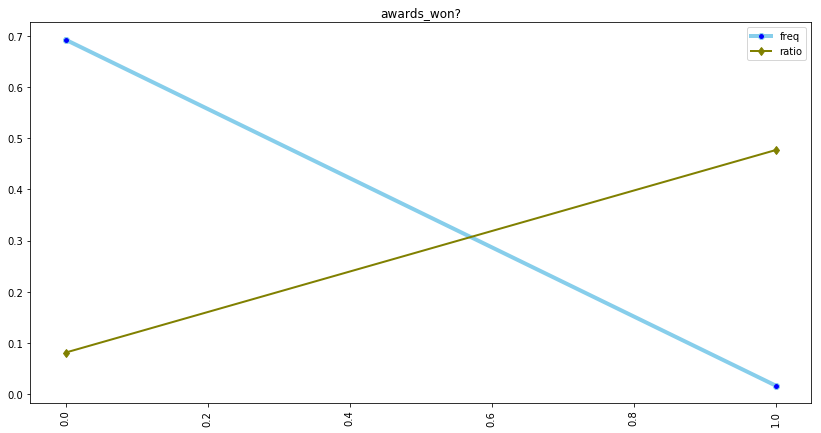

In [88]:
b_df = train_df.loc[train_df['department']=='Operations'] 
catcols = ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'awards_won?']

for cl in catcols:
    plotcategorical(b_df , cl)

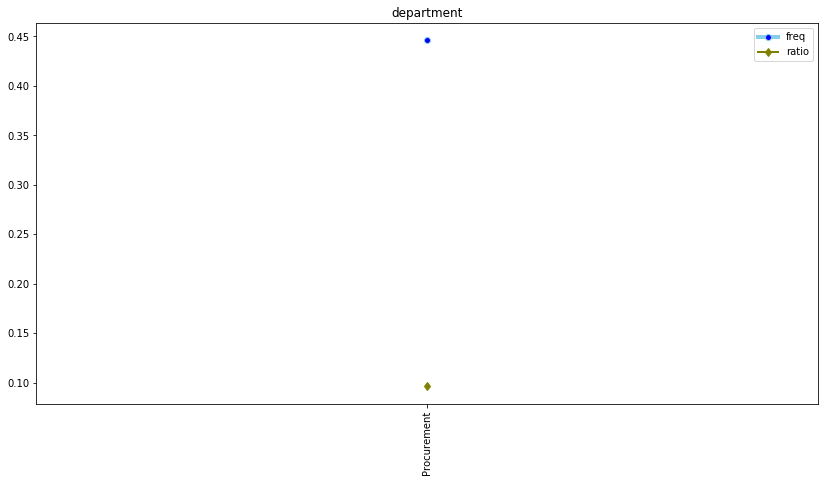

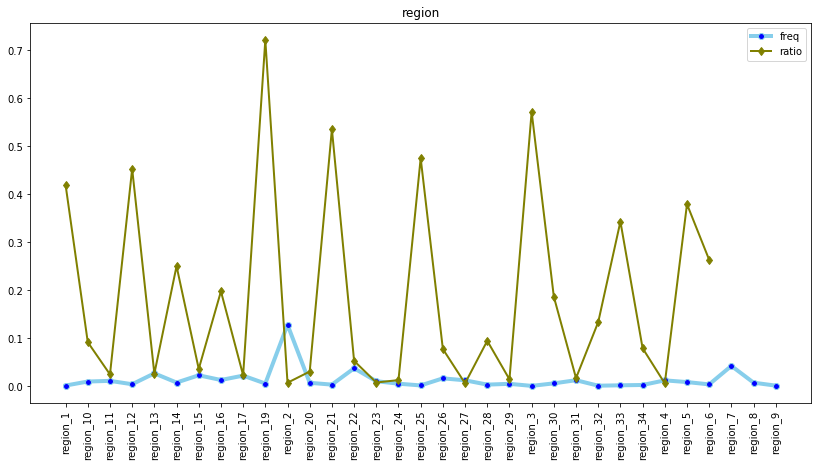

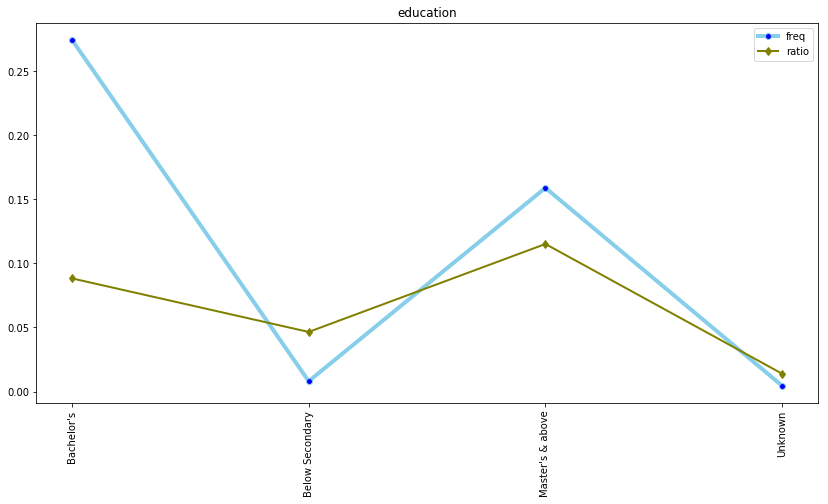

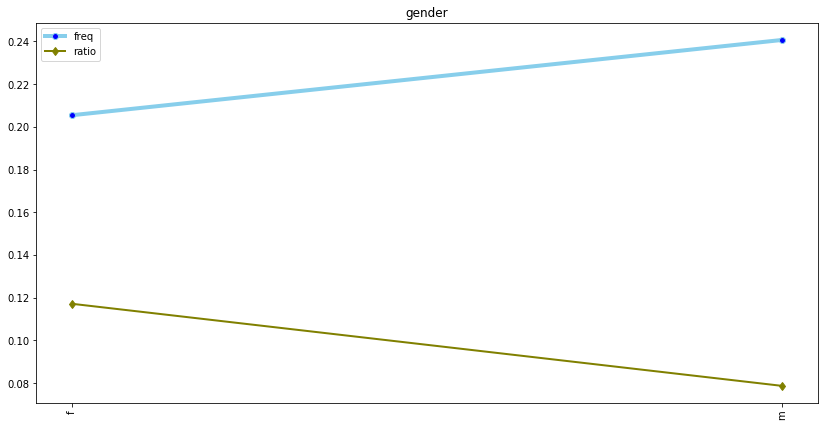

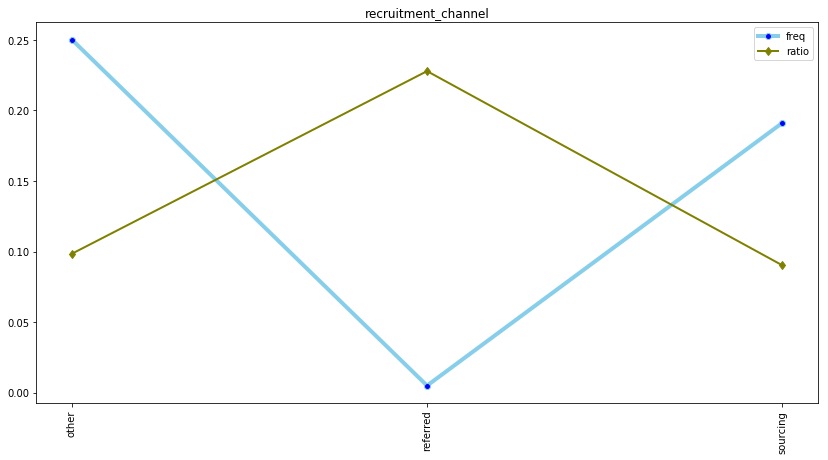

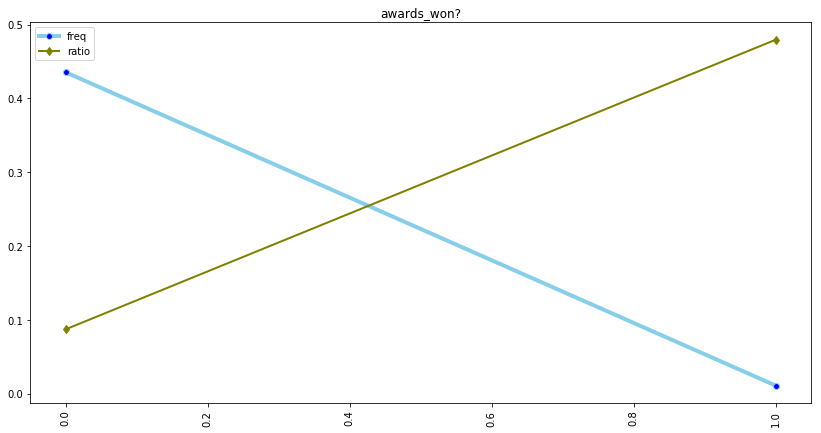

In [77]:
c_df = train_df.loc[train_df['department']=='Procurement'] 
catcols = ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'awards_won?']

for cl in catcols:
    plotcategorical(c_df , cl)

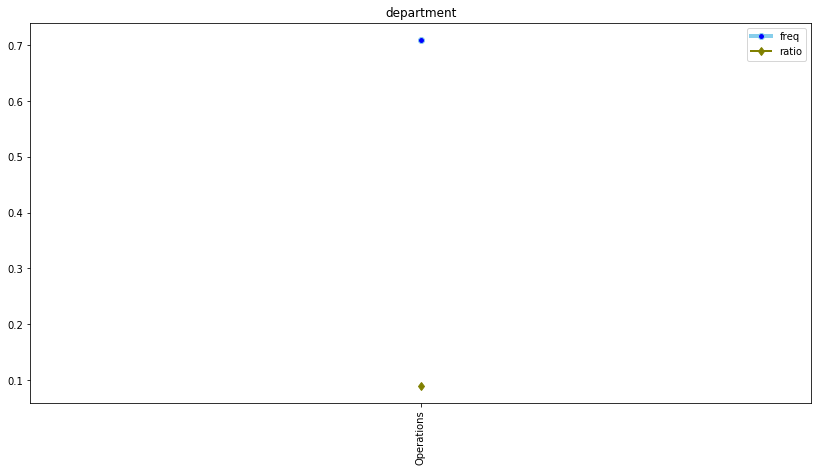

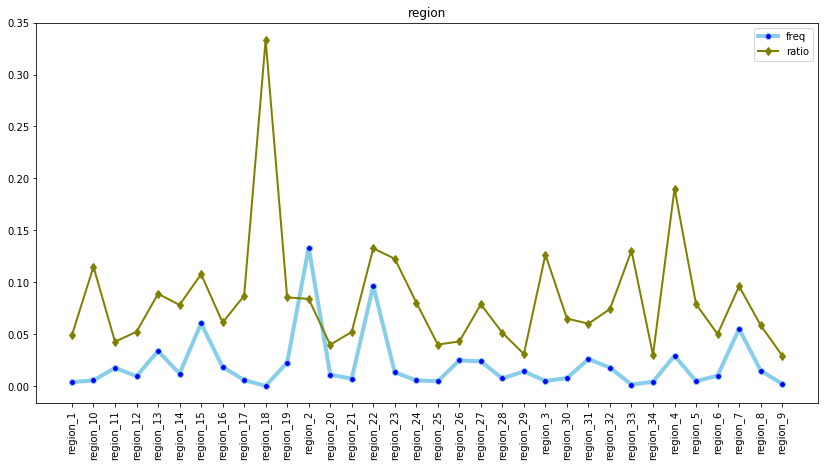

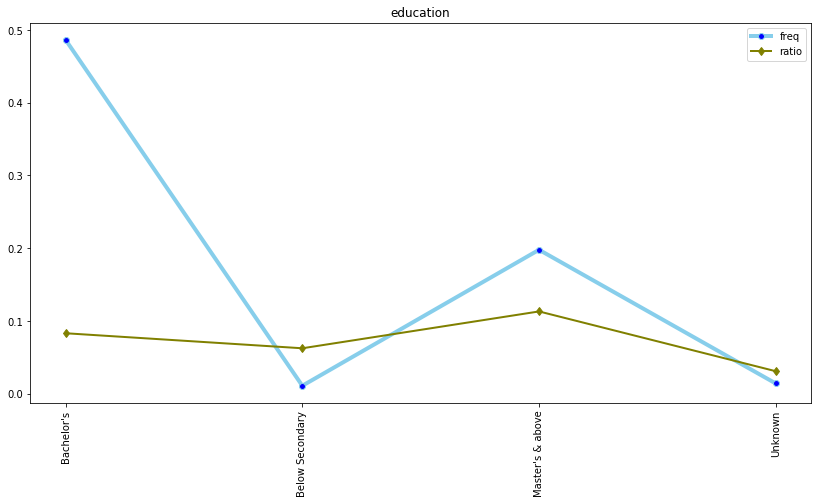

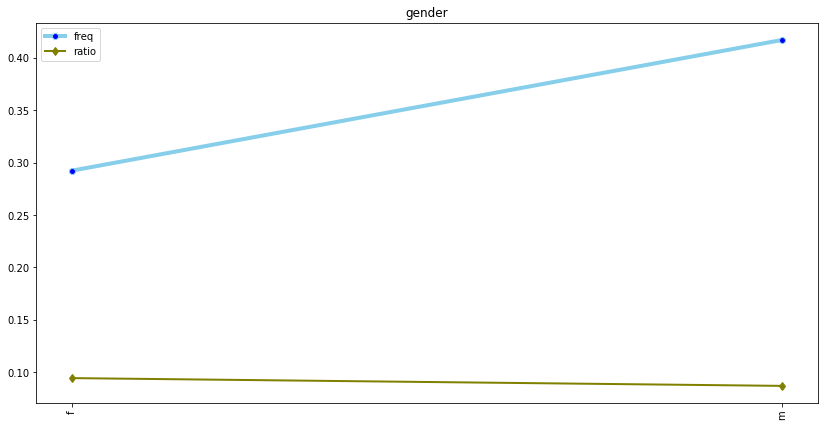

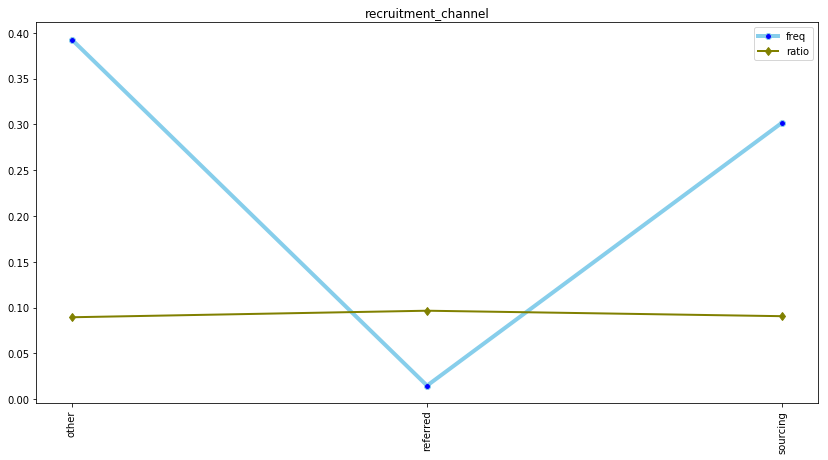

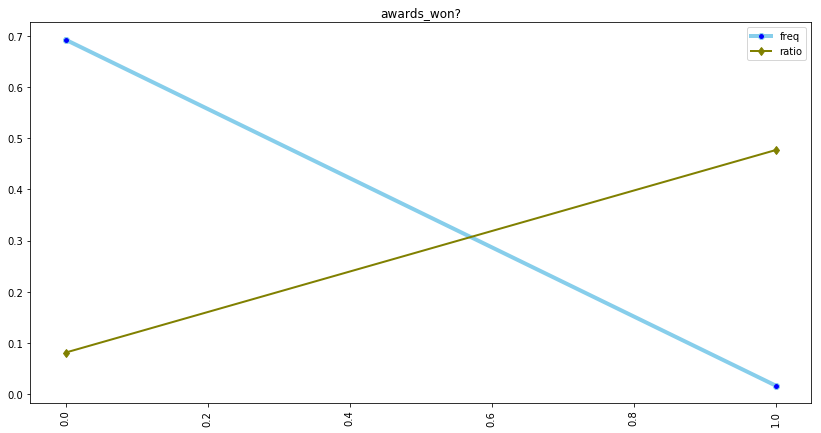

In [78]:
d_df = train_df.loc[train_df['department']=='Technology'] 
catcols = ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'awards_won?']

for cl in catcols:
    plotcategorical(b_df , cl)

ValueError: range parameter must be finite.

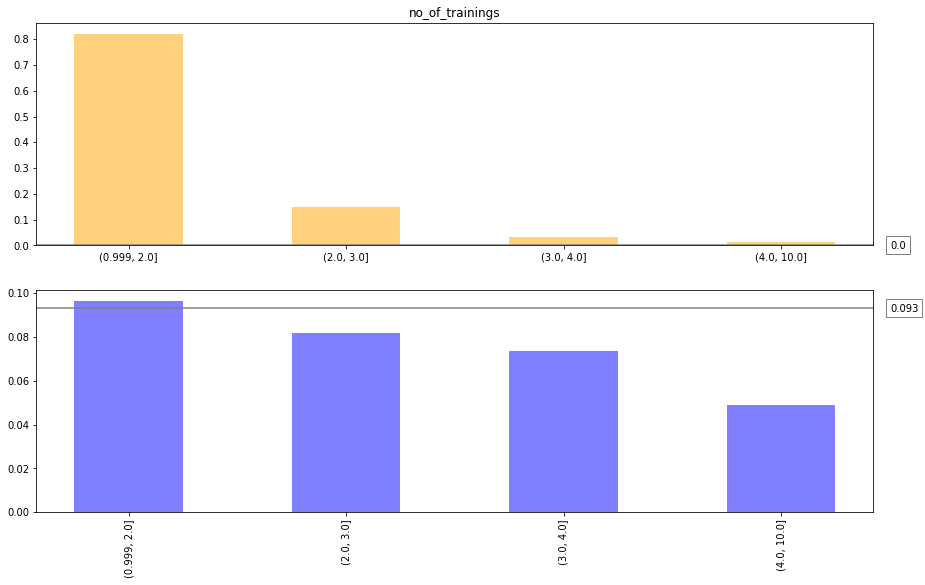

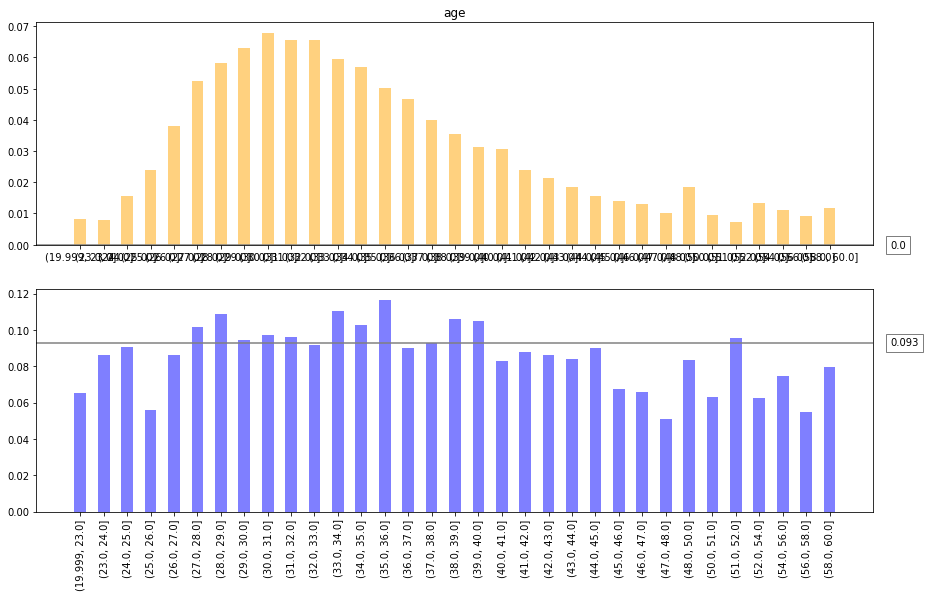

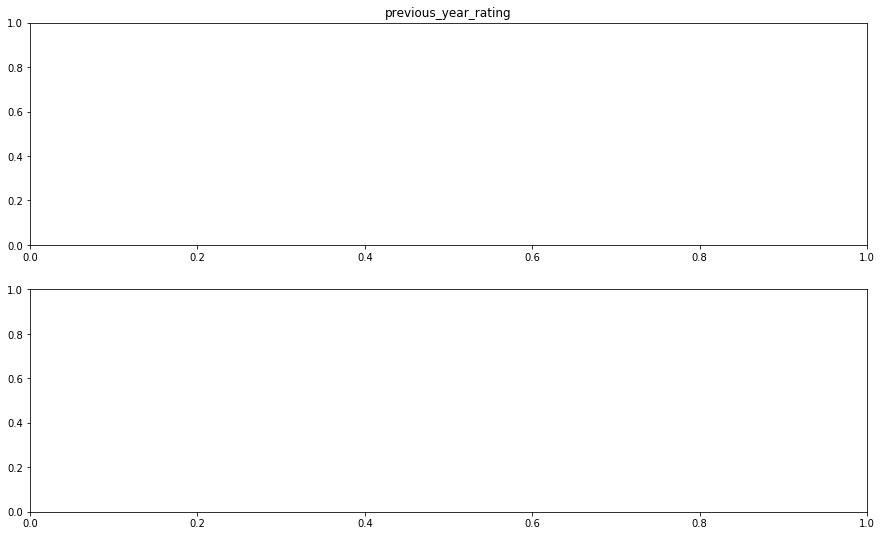

In [65]:
#numerical columns
numcols =  ['no_of_trainings', 'age', 'previous_year_rating', 'KPIs_met >80%',
       'avg_training_score']

for col in numcols:

    f,ax=plt.subplots(2,1,figsize=(15,9))
    ax[0].set_title(col)
    g=plotsum(train_df,col,'is_promoted',0,1,ax[0])
    g=plotratio(train_df,col,'is_promoted',0,1,ax[1])

In [ ]:
import stop

In [ ]:
train_df.columns

In [ ]:
promoted = train_df[train_df['is_promoted'] == 1].count()
unpromoted = train_df[train_df['is_promoted'] == 0].count()
ratio = promoted/unpromoted
print(ratio)

In [ ]:
promoted = train_df[train_df['is_promoted'] == 1]['education'].value_counts().sort_index().tolist()
unpromoted = train_df[train_df['is_promoted'] == 0]['education'].value_counts().sort_index().tolist()
print(promoted)
print(unpromoted)
ratio = [None]*4
for i in range(4):
    ratio[i] = (promoted[i]/unpromoted[i])
index = ["Bachelor's", "Below Secondary", "Master's & above", "Unknown"]
df = pd.DataFrame({'index': ratio}, index=index)
ax = df.plot.bar(rot=90, figsize = (6, 4), stacked = True)